In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
job_counts = df.pivot_table(
    index='job_title_short',
    aggfunc='size'
)

job_counts.sort_values(ascending=False)


job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

In [5]:
df.pivot_table(values= 'salary_year_avg', index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [6]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [8]:
df.pivot_table(values= 'salary_year_avg', index='job_country', columns= 'job_title_short' ,aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [10]:
top_countries = df['job_country'].value_counts().head(6).index

top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

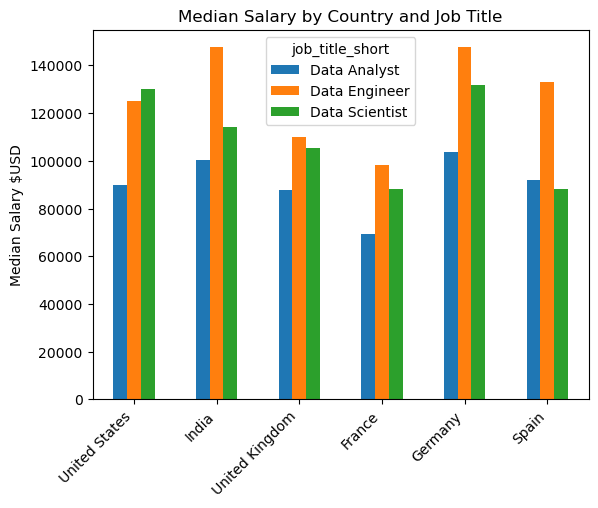

In [17]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles =['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary $USD')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

pivot_table = df.pivot_table(index=['job_title_short', 'job_country'], aggfunc='size')
pivot_table.head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

In [19]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

pivot_table = df.pivot_table(values='salary_year_avg', index='company_name', aggfunc=['max', 'min', 'mean'])
pivot_table.head()


,max,min,mean
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,77750.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


In [20]:
# Filter for only Data Scientist jobs
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

# Create pivot table
pivot_table = df_DS.pivot_table(values='salary_year_avg', index=['company_name', 'job_country'], aggfunc='median')
filtered_pivot_table = pivot_table[pivot_table['salary_year_avg'] > 200000]
filtered_pivot_table.head(10)

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0